# Présentation du projet
---
## *Objectif principal du projet :*  création d'un model de prédiction des performances des étudiants.
---
Pour y arriver à cette fin, nous devons passer par ses étapes suivantes :
### 1. Importation des bibliothèques nécessaires
### 2. Faire une connaissance des données (les attributs et leurs types)
    - Chargement des données et affichage des premières lignes
    - Vérification des types d'attributs et le nombre d'attribut et valeurs total
### 3. Une Analyse Exploratoire des données
    - Vérification de la présence des valeurs manquantes
    - Traitement des valeurs manquantes
    - Visualisation des données
    - Préparation des données pour le Machine Learning (encodage des valeurs non numériques en numériques)
    - Trouver les attributs pour Machine Learning (à partir de la corrélation)
### 4. Le Machine Learning (Apprentissage Automatique)
    - Sélection des caractéristiques (avant le ML)
    - Partionnement des données (train/test) et (train/validation/test)
    - Construction des modèles
    - Prédictions et Evaluation
    - Visualisation des meilleurs attributs pour le ML (feature importance)
    - Si possible, construire le modèle final à partir des meilleurs attributs
    - Choix du meilleur modèle à partir de la validation croisée.
    - Entrainement du modèle final sur l'ensemble des données d'entrainement, puis l'évaluer sur les données de test.
    - Sauvegarder le meilleur modèle si les scores sont satisfaisants.

### 1. Importation des bibliothèques nécessaires

In [78]:
# Bibliothèques pour la manipulation des données
import pandas as pd
import numpy as np
# Bibliothèques pour la visualisation des données
import matplotlib.pyplot as plt
import seaborn as sns
# Bibliothèques pour le machine learning (ou apprentissage automatique)
# from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomTreesEmbedding, GradientBoostingClassifier, AdaBoostClassifier
# Pour le modèle d'équilibrage des données
# from imblearn.ensemble import BalancedRandomForestClassifier
# import lazypredict
# from lazypredict.Supervised import LazyClassifier
# Métriques d'évaluation des modèles de machine learning
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, \
                            classification_report, precision_score, recall_score, roc_auc_score 
# Librairie pour sauvegarder le modèle (sérialisation)
import pickle
import joblib

### 2. Faire une connaissance des données (les attributs et leurs types)
    - Chargement des données et affichage des premières lignes

In [79]:
# Lecture du dataset
def read_data(filename) -> pd.DataFrame:
    """ 
    Fonction pour lire les données du fichier csv.
    
    Args:
       filename: Nom du fichier à lire pour récupérer les données.
       
    Returns:
        pd.DataFrame: Retourne un dataframe qui contient les données.
    """
    
    df_students_perf = pd.read_csv(filename)
    return df_students_perf
    
df_students_perf = read_data("Students_performance_data_new.csv")
df_students_perf

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,Female,Caucasian,Some_College,19.833723,7,Yes,Moderate,No,No,Yes,No,2.929196,C
1,1002,18,Male,Caucasian,High_School,15.408756,0,No,Low,No,No,No,No,3.042915,B
2,1003,15,Male,Asian,Bachelor's,4.210570,26,No,Moderate,No,No,No,No,0.112602,F
3,1004,17,Female,Caucasian,Bachelor's,10.028829,14,No,High,Yes,No,No,No,2.054218,D
4,1005,17,Female,Caucasian,Some_College,4.672495,17,Yes,High,No,No,No,No,1.288061,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,Female,Caucasian,Bachelor's,10.680555,2,No,Very_High,Yes,No,No,No,3.455509,B
2388,3389,17,Male,Caucasian,High_School,7.583217,4,Yes,Very_High,No,Yes,No,No,3.279150,B
2389,3390,16,Female,Caucasian,Some_College,6.805500,20,No,Moderate,No,No,No,Yes,1.142333,F
2390,3391,16,Female,African_American,NaN,12.416653,17,No,Moderate,No,Yes,Yes,No,1.803297,F


In [80]:
# Affichage de la signature de la fonction
?read_data

Signature: read_data(filename) -> pandas.core.frame.DataFrame
Docstring:
Fonction pour lire les données du fichier csv.

Args:
   filename: Nom du fichier à lire pour récupérer les données.
   
Returns:
    pd.DataFrame: Retourne un dataframe qui contient les données.
File:      c:\users\magariou diallo\appdata\local\temp\ipykernel_3172\2566181280.py
Type:      function


    - Vérification des types d'attributs, du nombre d'attribut et valeurs total

In [81]:
# Affichage des colonnes et leurs types
df_students_perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   object 
 3   Ethnicity          2392 non-null   object 
 4   ParentalEducation  2149 non-null   object 
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   object 
 8   ParentalSupport    2180 non-null   object 
 9   Extracurricular    2392 non-null   object 
 10  Sports             2392 non-null   object 
 11  Music              2392 non-null   object 
 12  Volunteering       2392 non-null   object 
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   object 
dtypes: float64(2), int64(3), object(10)
memory usage: 280.4+ KB


In [82]:
# Nombre d'attributs et nombre total d'enregistrement
print("Nombre total d'attributs : ", len(df_students_perf.columns), " *** Nombre d'enregistrement total : ", len(df_students_perf))

Nombre total d'attributs :  15  *** Nombre d'enregistrement total :  2392


In [83]:
# Une première stastistique descriptive des attributs numériques
# Le hic, il affiche toutes les données les lignes du dataframe
# df_students_perf.style.background_gradient(cmap='Blues', subset=["Age", "GPA"])

In [84]:
# Affichage des premières statistiques descriptives des données numériques
df_students_perf.describe().style.background_gradient(cmap="Blues", subset=["Absences", "GPA"])

,StudentID,Age,StudyTimeWeekly,Absences,GPA
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,9.771992,14.541388,1.906186
std,690.655244,1.123798,5.652774,8.467417,0.915156
min,1001.000000,15.000000,0.001057,0.000000,0.000000
25%,1598.750000,15.000000,5.043079,7.000000,1.174803
50%,2196.500000,16.000000,9.705363,15.000000,1.893393
75%,2794.250000,17.000000,14.408410,22.000000,2.622216
max,3392.000000,18.000000,19.978094,29.000000,4.000000


### 3. Une Analyse Exploratoire des données
    - Vérification de la présence des valeurs manquantes

In [85]:
# Vérification des valeurs nulles
df_students_perf.isna().sum()

StudentID              0
Age                    0
Gender                 0
Ethnicity              0
ParentalEducation    243
StudyTimeWeekly        0
Absences               0
Tutoring               0
ParentalSupport      212
Extracurricular        0
Sports                 0
Music                  0
Volunteering           0
GPA                    0
GradeClass             0
dtype: int64

*Note : Nous voyons des valeurs manquantes dans les colonnes 'ParentalEducation' et 'ParentalSupport'. cela est dû du fait que ces champs ont été renseignés sur 'None'. Pour ce faire, nous pouvons remplacer ces valeurs par 'No_Education' et 'No_Support' dans ce cas, parce que ce sont des élèves qui n'ont pas eu de support de leurs parents ou dont les parents n'ont pas étudié.*

In [86]:
# Affichage des valeurs uniques dans 'ParentalEducation' afin d'afficher le nan (not a number).
df_students_perf["ParentalEducation"].unique()

array(['Some_College', 'High_School', "Bachelor's", 'Higer', nan],
      dtype=object)

    - Traitement des valeurs manquantes

In [87]:
# # Remplacement des valeurs manquantes dans la colonne 'ParentalEducation' par 'No_Education' et dans 'ParentalSupport' par 'No_Support'
# def update_columns_values(df: pd.DataFrame) -> pd.DataFrame:
#     """ 
#     Fonction pour modifier des colonnes specifiques dans le dataframe.
    
#     Args:
#         df: Dataframe qui contient toutes les colonnes. 
    
#     Returns:
#         df: Dataframe qui contiendra toutes les colonnes y compris les valeurs des colonnes modifiees.    
#     """
# #     Vérification si le mot clé entre '' est dans la liste des columns du dataframe
#     if 'ParentalEducation' in df.index:
#         df["ParentalEducation"] = df["ParentalEducation"].fillna("No_Education")
#     elif 'ParentalSupport' in df.index:
#         df["ParentalSupport"] = df["ParentalSupport"].fillna("No_Support")
#     else:
#         pass
#     return df

In [88]:
# Application de la fonction fillna directement sur les colonnes pour apporter des modifications
# Utilisation d'un dictionnaire pour définir des valeurs des colonnes à modifier
values = {"ParentalEducation": "No_Education", "ParentalSupport": "No_Support"}
df_students_perf = df_students_perf.fillna(value=values)
df_students_perf

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,Female,Caucasian,Some_College,19.833723,7,Yes,Moderate,No,No,Yes,No,2.929196,C
1,1002,18,Male,Caucasian,High_School,15.408756,0,No,Low,No,No,No,No,3.042915,B
2,1003,15,Male,Asian,Bachelor's,4.210570,26,No,Moderate,No,No,No,No,0.112602,F
3,1004,17,Female,Caucasian,Bachelor's,10.028829,14,No,High,Yes,No,No,No,2.054218,D
4,1005,17,Female,Caucasian,Some_College,4.672495,17,Yes,High,No,No,No,No,1.288061,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,Female,Caucasian,Bachelor's,10.680555,2,No,Very_High,Yes,No,No,No,3.455509,B
2388,3389,17,Male,Caucasian,High_School,7.583217,4,Yes,Very_High,No,Yes,No,No,3.279150,B
2389,3390,16,Female,Caucasian,Some_College,6.805500,20,No,Moderate,No,No,No,Yes,1.142333,F
2390,3391,16,Female,African_American,No_Education,12.416653,17,No,Moderate,No,Yes,Yes,No,1.803297,F


In [89]:
# Vérfication de la présence des valeurs manquantes par colonne.
df_students_perf.isna().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [90]:
# Suppression de l'attribut StudentId
df_students_perf.drop("StudentID", axis=1, inplace=True)

In [91]:
# isinstance pour vérifier le type de l'objet (instance)
if isinstance(df_students_perf["Age"], pd.Series):
    print("Yes")
else:
    print("No")

Yes


In [92]:
df_students_perf["Age"].dtype

dtype('int64')

    - Visualisation des données

In [93]:
def univariate_data_visualization(df, column):
    """
    Fonction pour afficher les graphiques univariés (une seule variable) de chaque attribut.
    
    Args:
        df: Dataframe qui contient les colonnes.
        column: La colonne à afficher dépendamment du type.
        
    Returns:
        Retourne les graphiques dépendamment des conditions.
    """
    
#     Initialisation d'un objet figure avec les tailles
    plt.figure(figsize=(10, 6))
#     Modification de l'arrière plan des graphiques
    sns.set_style("darkgrid")
#     Vérification des types d'attributs afin d'afficher les graphiques selon le type
#    Si la colonne est de type numérique, j'affiche les graphiques appropiés.
    if (df[column].dtype == np.int64) or (df[column].dtype == np.float64):
#         Afficher un histogramme avec une courbe de densité.
        plt.title(f"Distribution pour la variable {column}")
        return sns.histplot(data=df, x=column, kde=True);
    else:
#         Affichage du nombre d'occurrences pour chaque attribut non numérique.
        plt.title(f"Nombre d'élements par catégorie pour {column}")
        sns.countplot(data=df, x=column, palette="magma");
#     Pour modifier l'axe des ordonnées de tous les graphiques
    plt.ylabel("Nombre")

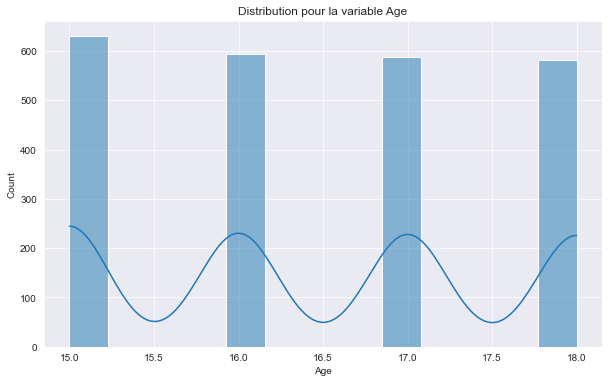

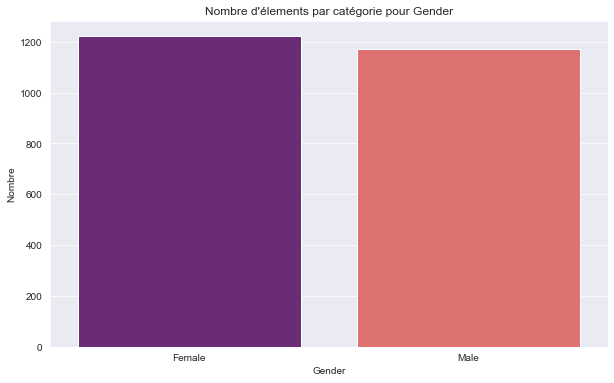

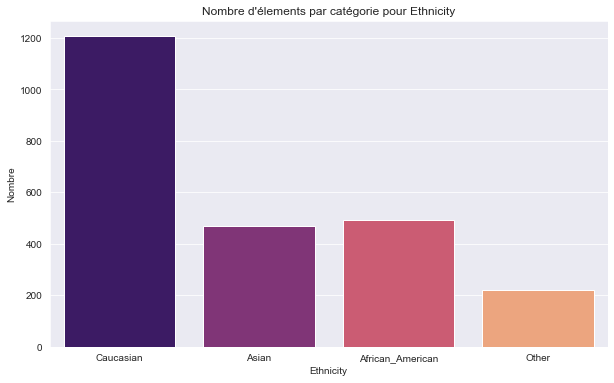

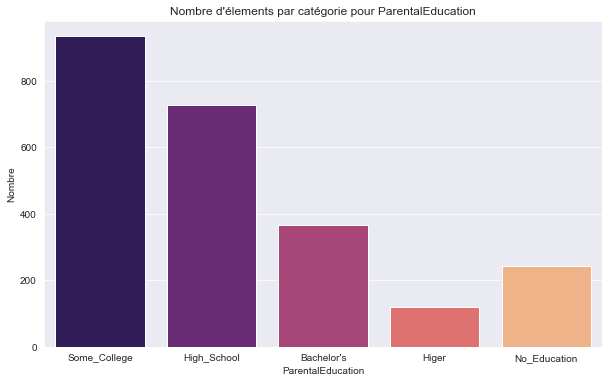

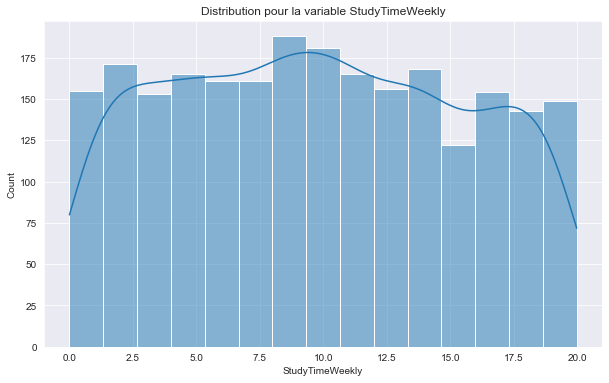

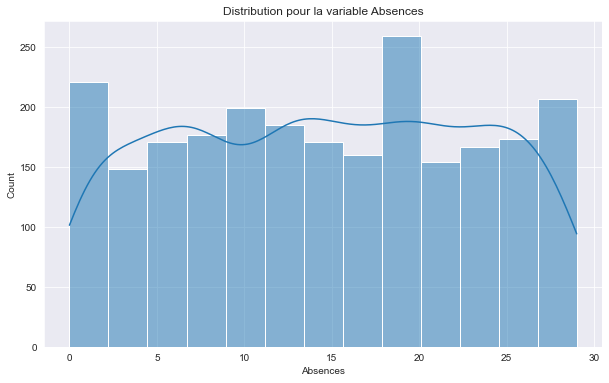

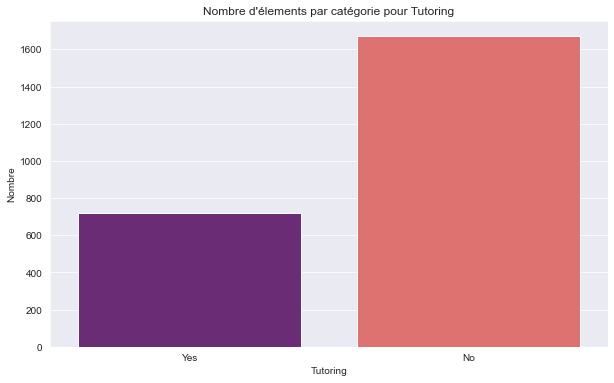

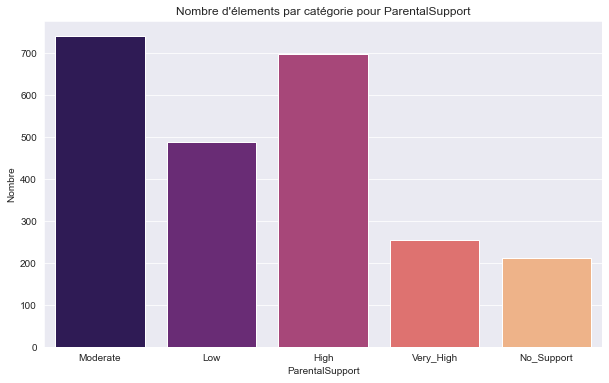

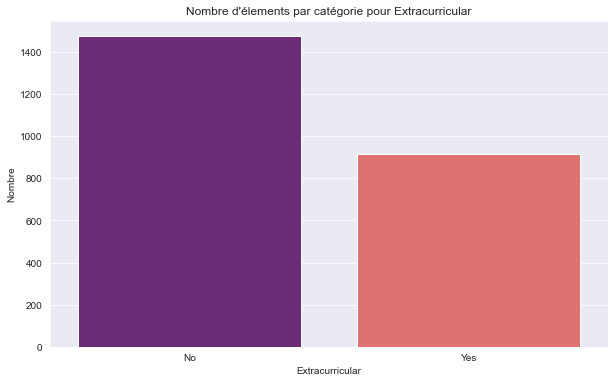

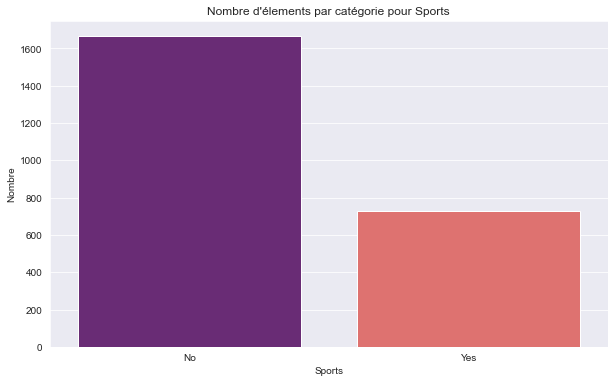

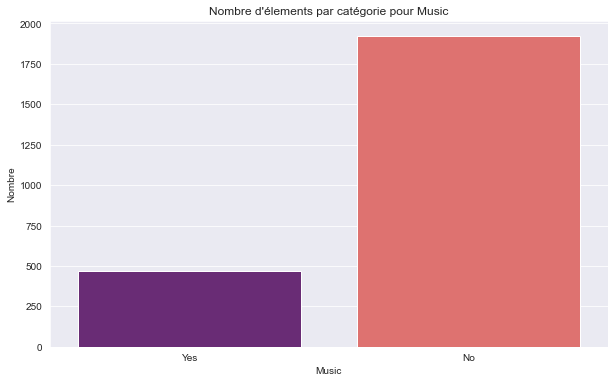

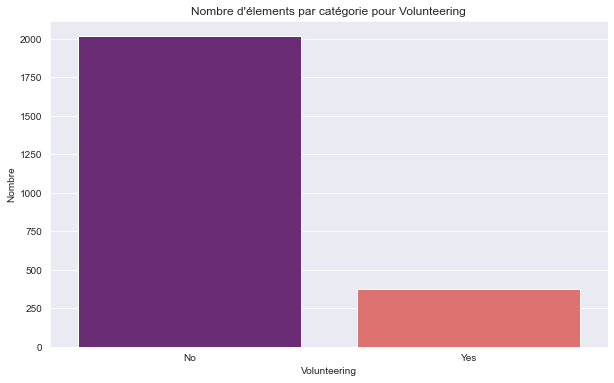

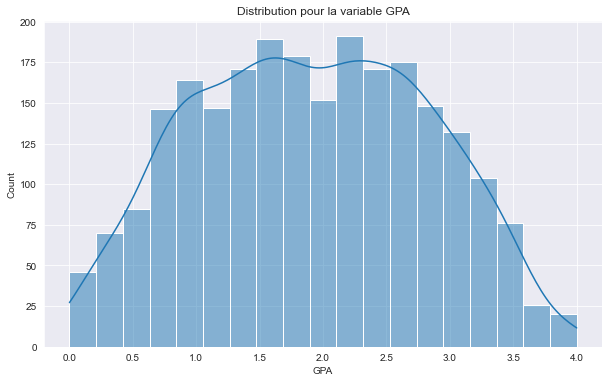

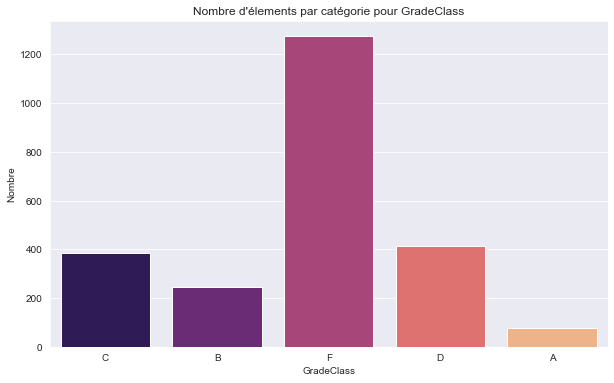

In [94]:
# Pour la visualisation univariée de chaque colonne (attribut)
for col in df_students_perf.columns:
    univariate_data_visualization(df_students_perf, col)

In [95]:
?univariate_data_visualization

Signature: univariate_data_visualization(df, column)
Docstring:
Fonction pour afficher les graphiques univariés (une seule variable) de chaque attribut.

Args:
    df: Dataframe qui contient les colonnes.
    column: La colonne à afficher dépendamment du type.
    
Returns:
    Retourne les graphiques dépendamment des conditions.
File:      c:\users\magariou diallo\appdata\local\temp\ipykernel_3172\3283684661.py
Type:      function


**Interprétation des graphiques :**

In [96]:
# Nombre d'occurrences par Note de cours.
df_students_perf["GradeClass"].value_counts()

F    1274
D     412
C     385
B     244
A      77
Name: GradeClass, dtype: int64

In [97]:
df_students_perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2392 non-null   int64  
 1   Gender             2392 non-null   object 
 2   Ethnicity          2392 non-null   object 
 3   ParentalEducation  2392 non-null   object 
 4   StudyTimeWeekly    2392 non-null   float64
 5   Absences           2392 non-null   int64  
 6   Tutoring           2392 non-null   object 
 7   ParentalSupport    2392 non-null   object 
 8   Extracurricular    2392 non-null   object 
 9   Sports             2392 non-null   object 
 10  Music              2392 non-null   object 
 11  Volunteering       2392 non-null   object 
 12  GPA                2392 non-null   float64
 13  GradeClass         2392 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 261.8+ KB


In [98]:
if isinstance(df_students_perf["Ethnicity"], object):
    print("True")
else:
    print("False")

True


In [99]:
# Fonction pour afficher les graphiques bivariés
def bivariate_data_visualization(df, column1, column2, kind="box"):
    """ 
    Fonction pour afficher les graphiques par couple de variable.
    
    Args:
        df (pd.DataFrame): DataFrame qui contient les attributs.
        column1 (int or str): 1er attribut qui va être affiché avec le second.
        column2 (int or str): Second attribut qui va être affiché avec le 1er.
        
    Returns: 
        Retourne les graphiques par couple d'attributs.    
    """
    
#     Vérification si les 2 attributs sont numériques et choisir le graphique en conséquences
    if ((df[column1].dtype == np.int64) & (df[column2].dtype == np.int64) |
       (df[column1].dtype == np.int64) & (df[column2].dtype == np.float64) |
       (df[column1].dtype == np.float64) & (df[column2].dtype == np.float64)):
        
        plt.figure(figsize=(8, 4))
        plt.title(f"Relation entre {column1} et {column2}")
        # sns.scatterplot(data=df, x=column1, y=column2)
        return sns.regplot(data=df, x=column1, y=column2);
    else:
        g = sns.catplot(data=df, x=column1, y=column2, kind=kind)
        plt.title(f"Moyenne des valeurs entre {column1} et {column2}")
        return g;
        # return sns.barplot(data=df, x=column1, y=column2, ci=None, palette="Set2");

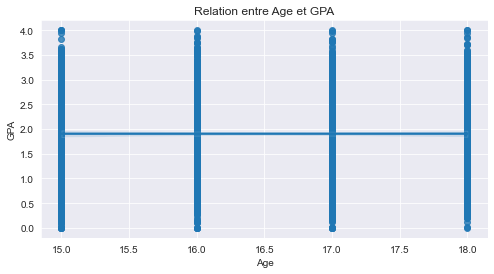

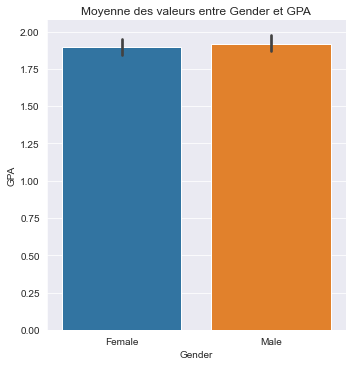

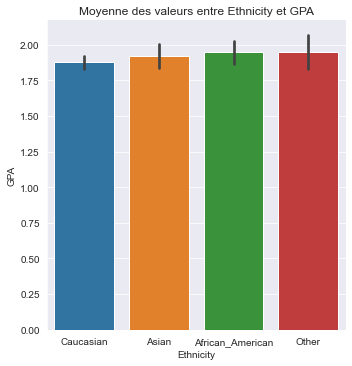

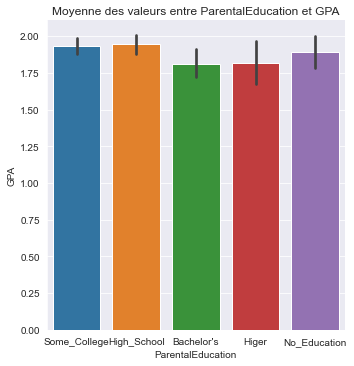

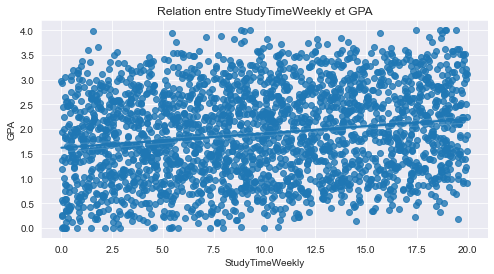

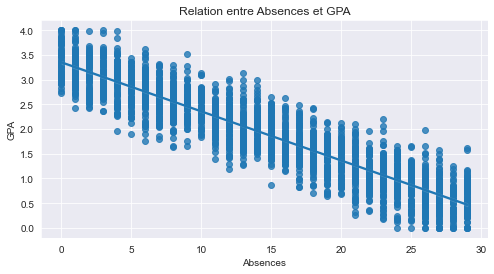

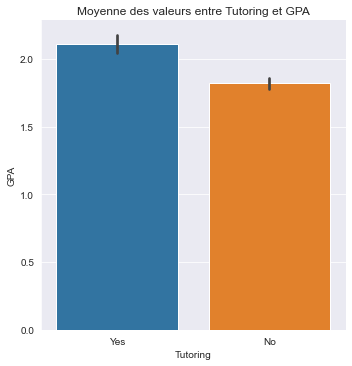

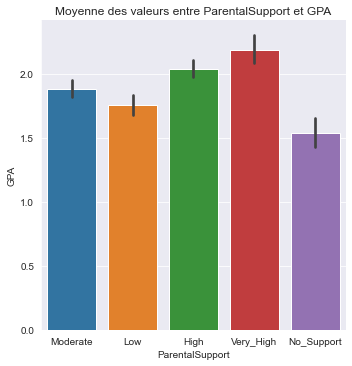

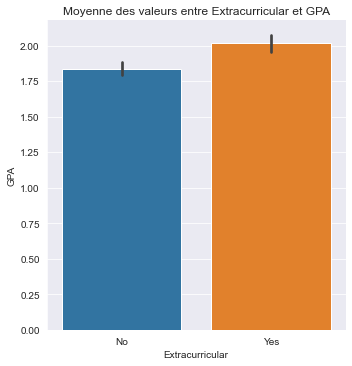

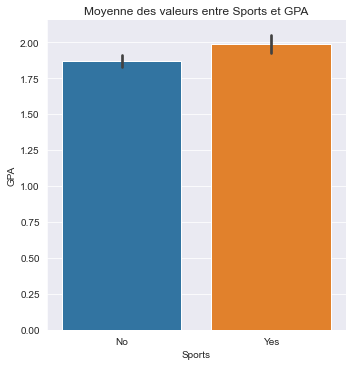

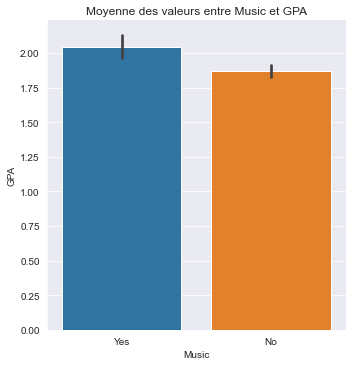

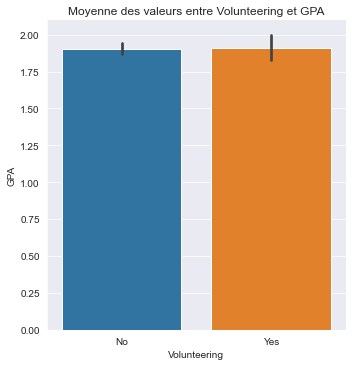

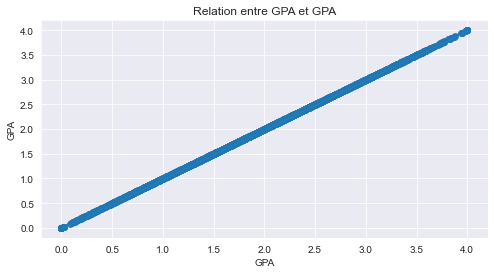

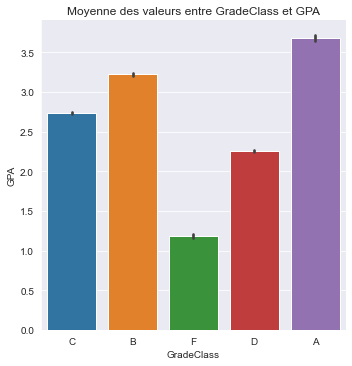

In [100]:
for col in df_students_perf.columns:
    bivariate_data_visualization(df_students_perf, col, "GPA", kind='bar')

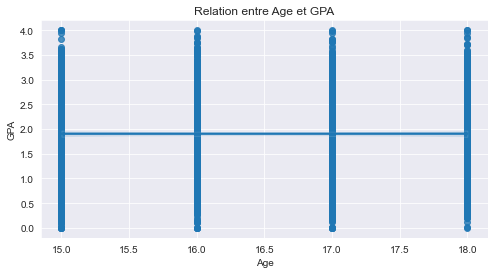

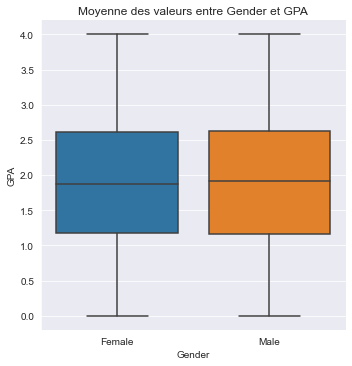

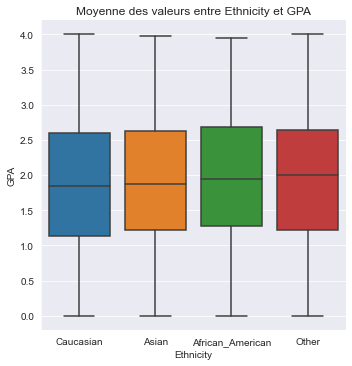

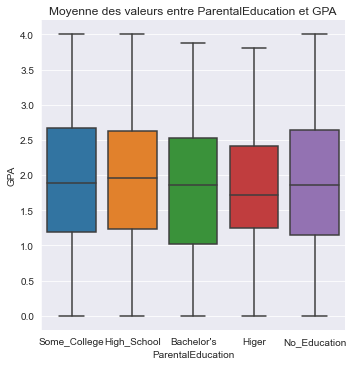

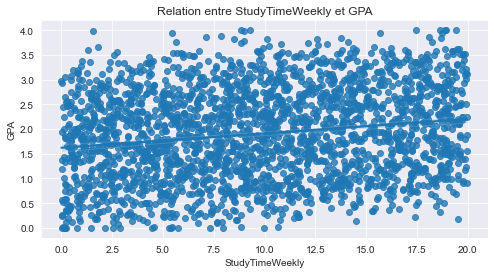

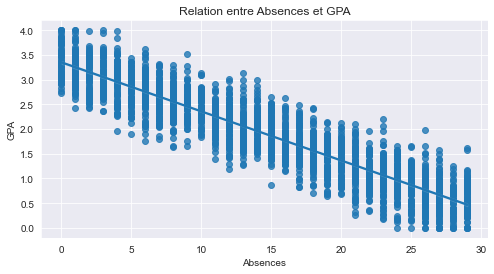

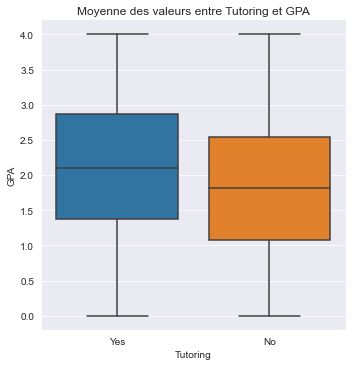

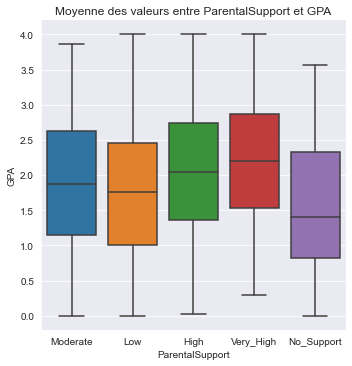

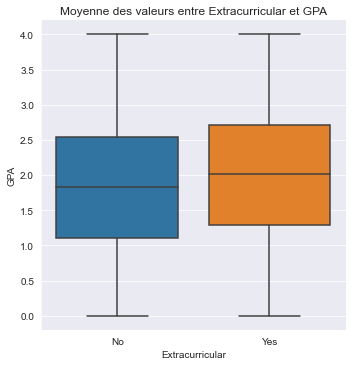

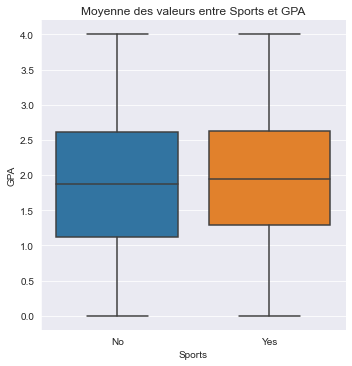

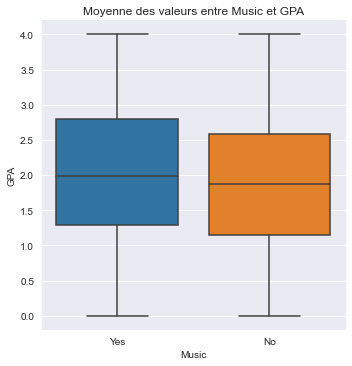

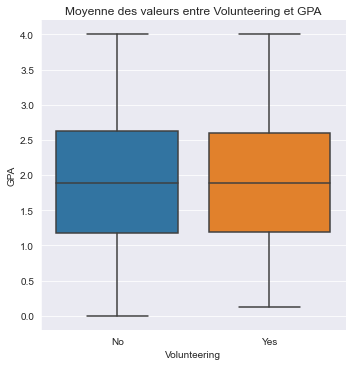

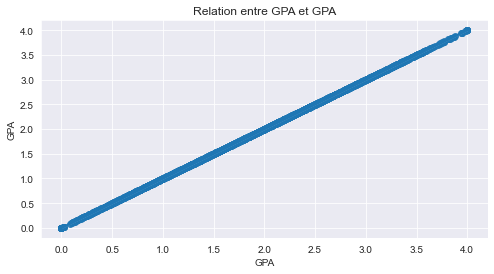

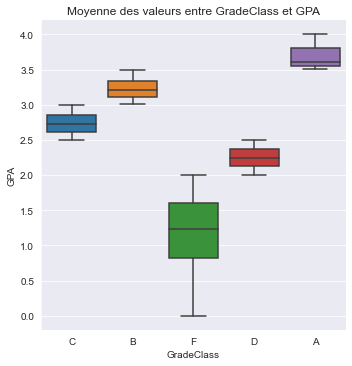

In [101]:
for col in df_students_perf.columns:
    bivariate_data_visualization(df_students_perf, col, "GPA", kind='box')

In [102]:
df_students_perf["GPA"].mean()

1.9061863027265407

In [103]:
df_students_perf.groupby("Ethnicity")["GPA"].mean()

Ethnicity
African_American    1.946437
Asian               1.922125
Caucasian           1.875905
Other               1.947696
Name: GPA, dtype: float64

In [104]:
# Ecart-type des étudiants par Ethnie
df_students_perf.groupby("Ethnicity")["GPA"].std()

Ethnicity
African_American    0.927947
Asian               0.917032
Caucasian           0.913751
Other               0.890072
Name: GPA, dtype: float64

In [105]:
# Age moyen des étudiants par ethnie
df_students_perf.groupby(["Ethnicity"])["Age"].mean().reset_index()

,Ethnicity,Age
0,African_American,16.423935
1,Asian,16.491489
2,Caucasian,16.499586
3,Other,16.351351


In [106]:
# Moyenne et ecart-type par Niveau d'éducation des parents.
df_students_perf.groupby("ParentalEducation").agg({"GPA": ["mean", "std"]}).reset_index()

ParentalEducation       GPA          
                         mean       std
0        Bachelor's  1.809082  0.944707
1             Higer  1.815812  0.809810
2       High_School  1.944022  0.897919
3      No_Education  1.893045  0.901772
4      Some_College  1.929881  0.931071

In [107]:
# Nombre d'étudiants par Niveau de formation des parents
df_students_perf["ParentalEducation"].value_counts()

Some_College    934
High_School     728
Bachelor's      367
No_Education    243
Higer           120
Name: ParentalEducation, dtype: int64

In [108]:
# Nombre d'étudiants par Niveau d'aide des parents
df_students_perf["ParentalSupport"].value_counts()

Moderate      740
High          697
Low           489
Very_High     254
No_Support    212
Name: ParentalSupport, dtype: int64

In [109]:
# Moyenne et ecart-type par Niveau d'aide des parents.
df_students_perf.groupby("ParentalSupport").agg({"GPA": ["mean", "std"]}).reset_index()

ParentalSupport       GPA          
                       mean       std
0            High  2.042409  0.882850
1             Low  1.755700  0.893974
2        Moderate  1.884246  0.912986
3      No_Support  1.540128  0.918257
4       Very_High  2.191545  0.894968

In [110]:
# Nombre d'étudiants par ethnie
df_students_perf["Ethnicity"].value_counts()

Caucasian           1207
African_American     493
Asian                470
Other                222
Name: Ethnicity, dtype: int64

In [111]:
# Nombre d'étudiants par grade et par age
df_students_perf.groupby(["GradeClass", "Age"])["GPA"].count().reset_index(name="Nombre")

,GradeClass,Age,Nombre
0,A,15,17
1,A,16,23
2,A,17,17
3,A,18,20
4,B,15,67
5,B,16,61
6,B,17,54
7,B,18,62
8,C,15,101
9,C,16,84


In [112]:
# Nombre d'étudiants par grade et par ethnie
df_students_perf.groupby(["GradeClass", "Ethnicity"])["GPA"].count().reset_index(name="Nombre")

,GradeClass,Ethnicity,Nombre
0,A,African_American,19
1,A,Asian,17
2,A,Caucasian,34
3,A,Other,7
4,B,African_American,53
5,B,Asian,48
6,B,Caucasian,123
7,B,Other,20
8,C,African_American,80
9,C,Asian,71


In [113]:
df_students_perf["Ethnicity"].value_counts()

Caucasian           1207
African_American     493
Asian                470
Other                222
Name: Ethnicity, dtype: int64

<Figure size 3000x1800 with 0 Axes>

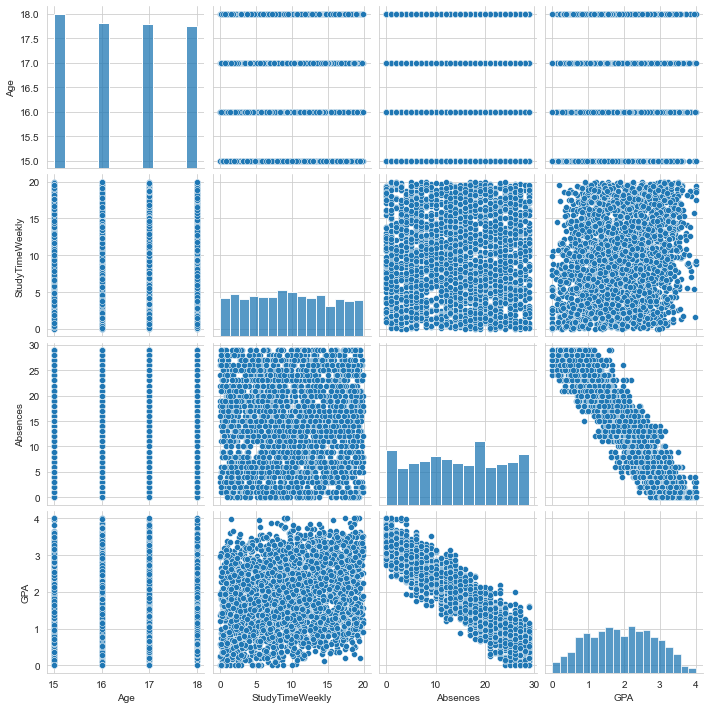

In [114]:
plt.figure(figsize=(30, 18), dpi=100)
sns.set_style("whitegrid")
sns.pairplot(df_students_perf)

    - Préparation des données pour le Machine Learning (encodage des valeurs non numériques en numériques)

In [115]:
# Affichage du dataframe
df_students_perf

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,Female,Caucasian,Some_College,19.833723,7,Yes,Moderate,No,No,Yes,No,2.929196,C
1,18,Male,Caucasian,High_School,15.408756,0,No,Low,No,No,No,No,3.042915,B
2,15,Male,Asian,Bachelor's,4.210570,26,No,Moderate,No,No,No,No,0.112602,F
3,17,Female,Caucasian,Bachelor's,10.028829,14,No,High,Yes,No,No,No,2.054218,D
4,17,Female,Caucasian,Some_College,4.672495,17,Yes,High,No,No,No,No,1.288061,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,18,Female,Caucasian,Bachelor's,10.680555,2,No,Very_High,Yes,No,No,No,3.455509,B
2388,17,Male,Caucasian,High_School,7.583217,4,Yes,Very_High,No,Yes,No,No,3.279150,B
2389,16,Female,Caucasian,Some_College,6.805500,20,No,Moderate,No,No,No,Yes,1.142333,F
2390,16,Female,African_American,No_Education,12.416653,17,No,Moderate,No,Yes,Yes,No,1.803297,F


In [116]:
# Autre approche avec scikit-learn (LabelEncoder)
# encoder = LabelEncoder()
# df_students_perf.apply(encoder.fit_transform)

# Note: Je vais utiliser l'approche avec la méthode .replace du dataframe en passant par les dictionnaires.
# Un dictionnaire pour chaque colonne
gender_dict = {"Male" : 0, "Female" : 1}
ethnicity_dict = {"Caucasian" : 0, "African_American" : 1, "Asian" : 2, "Other" : 3}
parental_educ_dict = {"No_Education" : 0, "High_School" : 1, "Some_College" : 2, "Bachelor's" : 3, "Higer" : 4}
tutoring_dict = {"No" : 0, "Yes" : 1}
parental_support_dict = {"No_Support" : 0, "Low" : 1, "Moderate" : 2, "High" : 3, "Very_High" : 4}
extra_curricular_dict = {"No" : 0, "Yes" : 1}
sports_dict = {"No" : 0, "Yes" : 1}
music_dict = {"No" : 0, "Yes" : 1}
volunteering_dict = {"No" : 0, "Yes" : 1}

# Application de l'encodage directement à partir des colonnes
# Pour Ethnicity
df_students_perf.replace({"Ethnicity" : ethnicity_dict}, inplace=True)
# Pour Gender
df_students_perf.replace({"Gender" : gender_dict}, inplace=True)
# Pour ParentalEducation
df_students_perf.replace({"ParentalEducation" : parental_educ_dict}, inplace=True)
# Pour Tutoring
df_students_perf.replace({"Tutoring" : tutoring_dict}, inplace=True)
# Pour ParentalSupport
df_students_perf.replace({"ParentalSupport" : parental_support_dict}, inplace=True)
# Pour Extracurricular
df_students_perf.replace({"Extracurricular" : extra_curricular_dict}, inplace=True)
# Pour Sports
df_students_perf.replace({"Sports" : sports_dict}, inplace=True)
# Pour Music
df_students_perf.replace({"Music" : music_dict}, inplace=True)
# Pour Volunteering
df_students_perf.replace({"Volunteering" : volunteering_dict}, inplace=True)

In [117]:
df_students_perf

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,C
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,B
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,F
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,D
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,B
2388,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,B
2389,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,F
2390,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,F


In [118]:
df_students_perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2392 non-null   int64  
 1   Gender             2392 non-null   int64  
 2   Ethnicity          2392 non-null   int64  
 3   ParentalEducation  2392 non-null   int64  
 4   StudyTimeWeekly    2392 non-null   float64
 5   Absences           2392 non-null   int64  
 6   Tutoring           2392 non-null   int64  
 7   ParentalSupport    2392 non-null   int64  
 8   Extracurricular    2392 non-null   int64  
 9   Sports             2392 non-null   int64  
 10  Music              2392 non-null   int64  
 11  Volunteering       2392 non-null   int64  
 12  GPA                2392 non-null   float64
 13  GradeClass         2392 non-null   object 
dtypes: float64(2), int64(11), object(1)
memory usage: 261.8+ KB


In [119]:
# Pour l'encodage de la variable cible, je vais utiliser le LabelEncoder()
# Les données seront encodées comme suit en suivant un ordre
# A: 0, B:1, C:2, D:3, F:4
encoder = LabelEncoder()
df_students_perf["GradeClass"] = encoder.fit_transform(df_students_perf["GradeClass"])
df_students_perf

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,1
2388,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,1
2389,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,4
2390,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,4


In [120]:
df_students_perf["GradeClass"].value_counts()

4    1274
3     412
2     385
1     244
0      77
Name: GradeClass, dtype: int64

    - Trouver les attributs pour Machine Learning (à partir de la corrélation)

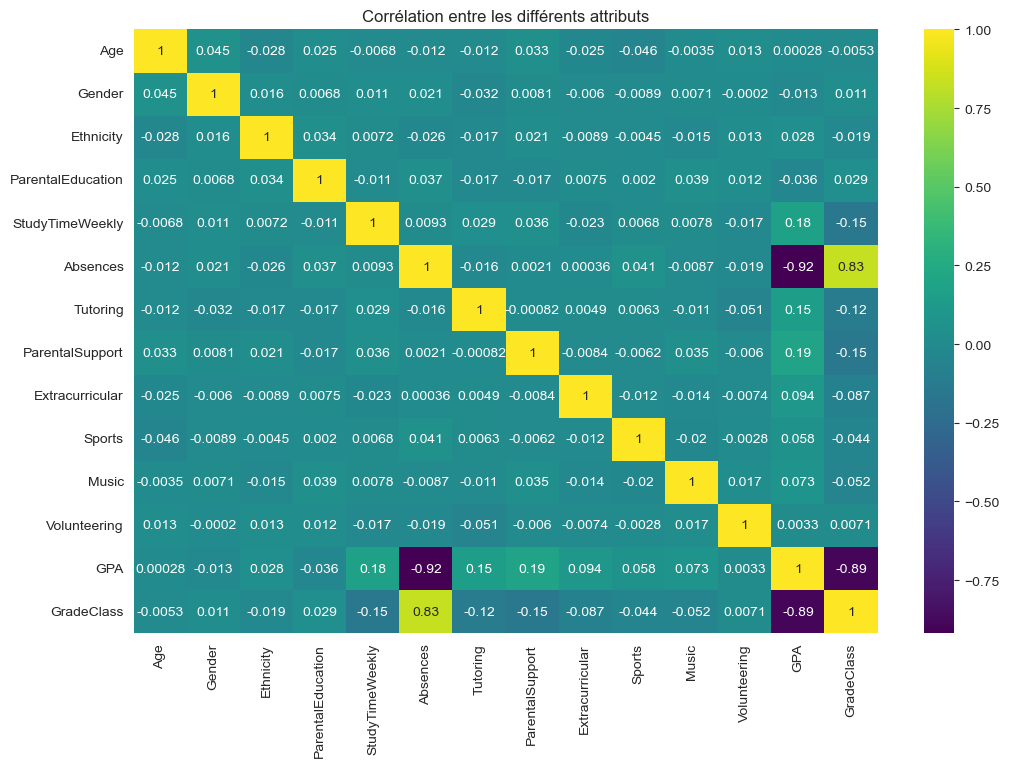

In [121]:
# Corrélation entre les différentes variables
plt.figure(figsize=(12, 8), dpi=100)
plt.title("Corrélation entre les différents attributs")
sns.heatmap(data=df_students_perf.corr(), annot=True, cmap='viridis');

### 4. Le Machine Learning (Apprentissage Automatique)
    - Sélection des caractéristiques (avant le ML)

In [122]:
?train_test_split

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation and
``next(ShuffleSplit().split(X, y))`` and application to input data
into a single call for splitting (and optionally subsampling) data in a
oneliner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

train

    - Partionnement des données (train/test) et (train/validation/test)

In [123]:
def data_partitionning(data, target):
    """ 
    Fonction pour partionner les données en entrainement/test (possible validation).
    
    Args:
        data (pd.DataFrame): DataFrame à partitionner en entrainement et test.
        target (pd.Series): Serie contenant uniquement la variable cible
        
    Returns:
        X_train (pd.DataFrame): Données d'entrainement contenant toutes les caractéristiques sans la varible cible(GradeClass)
        y_train (pd.Series): Données d'entrainement contenant uniquement les valeurs de la cible
        X_test (pd.DataFrame): Données de test contenant toutes les caractéristiques (sans la cible) pour faire la prédiction de la variable cible
        y_test (pd.Series): Données de test contenant uniquement la cible pour faire l'évaluation.    
    """
    
#     Partitionnement des données en entrainement et test
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

In [124]:
# Définition des paramètres de la fonction précédente
data = df_students_perf.drop("GradeClass", axis=1)
target = df_students_perf["GradeClass"]
# Affichage des échantillons des données partitionnée
X_train, X_test, y_train, y_test = data_partitionning(data, target)
X_train, "****", X_test, "****", y_train, "****", y_test

(      Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  Absences  \
 642    18       1          0                  4        18.118879        24   
 1752   16       1          3                  2         2.469271        19   
 1401   17       0          2                  3         3.456401        25   
 2032   17       1          0                  1        15.838131        25   
 990    16       0          0                  0         1.045373        19   
 ...   ...     ...        ...                ...              ...       ...   
 1638   15       0          1                  0        13.092424        13   
 1095   16       0          0                  2         2.159249        19   
 1130   16       1          0                  2         3.572578        14   
 1294   18       0          3                  2         4.402585        20   
 860    18       0          1                  2         5.427628        27   
 
       Tutoring  ParentalSupport  Extracurricular 

In [125]:
def data_scaling(X_train, X_test):
    """ 
    Standardiser les données pour les ramener à la même plage de valeurs.
    
    Args:
        X_train (pd.DataFrame): Données d'entrainement sans la variable cible. 
        X_test (pd.DataFrame): Données de test sans la variable cible.
        
    Returns:
        scaled_X_train (array): Données d'entrainement transformées et mises à l'échelle.
        scaled_X_test (array): Données de test mises à l'échelle.
        scaler : Le normalisateur des données.
    """
    
    scaler = StandardScaler()
    scaled_X_train = scaler.fit_transform(X_train)
    scaled_X_test = scaler.transform(X_test)
    
    return scaler, scaled_X_train, scaled_X_test

In [126]:
# ?StandardScaler

In [127]:
# Récupération des données mises à l'échelle
scaler, scaled_X_train, scaled_X_test = data_scaling(X_train, X_test)
scaled_X_train, "*******", scaled_X_test

(array([[ 1.37285117,  0.97165101, -0.84616672, ..., -0.49705784,
         -0.43041146, -0.55096019],
        [-0.40585814,  0.97165101,  2.06170801, ..., -0.49705784,
          2.3233582 , -1.25109413],
        [ 0.48349652, -1.0291761 ,  1.09241643, ..., -0.49705784,
         -0.43041146, -1.92618913],
        ...,
        [-0.40585814,  0.97165101, -0.84616672, ..., -0.49705784,
         -0.43041146,  0.16457584],
        [ 1.37285117, -1.0291761 ,  2.06170801, ..., -0.49705784,
         -0.43041146, -0.60256052],
        [ 1.37285117, -1.0291761 ,  0.12312486, ..., -0.49705784,
         -0.43041146, -2.06162881]]),
 '*******',
 array([[-1.29521279,  0.97165101,  1.09241643, ...,  2.01183831,
          2.3233582 , -0.51664154],
        [-0.40585814,  0.97165101, -0.84616672, ..., -0.49705784,
          2.3233582 ,  1.3273431 ],
        [-1.29521279, -1.0291761 , -0.84616672, ..., -0.49705784,
          2.3233582 ,  0.14913268],
        ...,
        [ 0.48349652, -1.0291761 , -0.8461

In [128]:
len(scaled_X_train), "****", len(scaled_X_test)

(1913, '****', 479)

In [129]:
?data_scaling

Signature: data_scaling(X_train, X_test)
Docstring:
Standardiser les données pour les ramener à la même plage de valeurs.

Args:
    X_train (pd.DataFrame): Données d'entrainement sans la variable cible. 
    X_test (pd.DataFrame): Données de test sans la variable cible.
    
Returns:
    scaled_X_train (array): Données d'entrainement transformées et mises à l'échelle.
    scaled_X_test (array): Données de test mises à l'échelle.
    scaler : Le normalisateur des données.
File:      c:\users\magariou diallo\appdata\local\temp\ipykernel_3172\399432342.py
Type:      function


    - Construction des modèles

In [130]:
# # Transformation de la variable cible en tableau numpy
# y_train = np.array(y_train)
# y_test = np.array(y_test)

In [131]:
def model_building(scaled_X_train, y_train):
    """ 
    Construire des modèles sans validation croisée.
    
    Args:
        scaled_X_train (array): Données d'entrainement sans la variable cible (tableau de caractéristiques mis à l'échelle)
        y_train (pd.Series): Données d'entrainement contenant uniquement la variable cible.
        
    Returns:
       list: Une liste des modèles entrainés. 
    """
    
#     Liste des modèles à retourner
    trained_models = []
# Liste des modèles à entrainer    
    base_models = [DecisionTreeClassifier(max_depth=10, random_state=0), RandomForestClassifier(max_depth=10, n_estimators=10, random_state=0),
                   GradientBoostingClassifier(max_depth=10, n_estimators=10, random_state=0), AdaBoostClassifier(n_estimators=10, random_state=0)]
    
#     Parcourir les modèles et les entrainer
    for model in base_models:
        model.fit(scaled_X_train, y_train)
        trained_models.append(model)
        
#     Retourner la liste des modèles entraînés
    return trained_models

In [132]:
def model_building_with_cv(scaled_X_train, y_train, n_splits=5):
    """
    Construire des modèles avec validation croisée, faire des prédictions et évaluer la performance des modèles.

    Args:
        scaled_X_train (array): Données d'entraînement sans la variable cible (tableau de caractéristiques mises à l'échelle).
        y_train (pd.Series): Données d'entraînement contenant uniquement la variable cible.
        n_splits (int): Nombre de plis pour la validation croisée (par défaut : 5).

    Returns:
        dict: Un dictionnaire contenant les modèles entraînés et les scores de précision, F1-score, 
              rapport de classification et matrices de confusion pour chaque modèle.
    """
    # Liste des modèles à entrainer
    base_models = [DecisionTreeClassifier(max_depth=10, random_state=0),
                   RandomForestClassifier(max_depth=10, n_estimators=10, random_state=0),
                   GradientBoostingClassifier(max_depth=10, n_estimators=10, random_state=0),
                   AdaBoostClassifier(n_estimators=10, random_state=0),] 
                   # BalancedRandomForestClassifier(max_depth=10, n_estimators=10, random_state=0)
    # Initialiser un dictionnaire pour stocker les modèles et leurs scores de précision.
    model_performance = {model.__class__.__name__: {
                            'model': model, 
                            'accuracy_scores': [], 
                            'f1_scores': [], 
                            'classification_reports': [], 
                            'confusion_matrices': []
                         } for model in base_models}
    
    # Création d'une validation croisée à K plis
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=0)
    
    # Boucle sur chaque split de la validation croisée
    for train_index, test_index in kf.split(scaled_X_train):
        # Sélectionner les données d'entraînement et de test pour ce pli
        X_train_fold, X_test_fold = scaled_X_train[train_index], scaled_X_train[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
        
        # Parcourir les modèles et les entrainer
        for model in base_models:
            model_name = model.__class__.__name__  # Obtenir le nom du modèle
            model.fit(X_train_fold, y_train_fold)  # Entraîner le modèle sur le pli d'entraînement
            y_pred_fold = model.predict(X_test_fold)  # Prédire les étiquettes pour le pli de test
            
            # Calculer la précision et l'ajouter à la liste des scores
            accuracy = accuracy_score(y_test_fold, y_pred_fold)
            f1 = f1_score(y_test_fold, y_pred_fold, average='weighted', zero_division=0) # Calcul du F1-score pondéré
            report = classification_report(y_test_fold, y_pred_fold, output_dict=True, zero_division=0)  # Générer le rapport de classification
            confusion = confusion_matrix(y_test_fold, y_pred_fold)  # Générer la matrice de confusion
            
            # Ajouter les scores et les rapports au dictionnaire
            model_performance[model_name]['accuracy_scores'].append(accuracy)
            model_performance[model_name]['f1_scores'].append(f1)
            # model_performance[model_name]['classification_reports'].append(report)
            # model_performance[model_name]['confusion_matrices'].append(confusion)
    
    # Calculer les moyennes pour chaque modèle
    for model_name in model_performance:
        model_performance[model_name]['mean_accuracy'] = sum(model_performance[model_name]['accuracy_scores']) / n_splits
        model_performance[model_name]['mean_f1_score'] = sum(model_performance[model_name]['f1_scores']) / n_splits
    
    return model_performance  # Retourner le dictionnaire contenant les performances des modèles

In [133]:
model_building_with_cv(scaled_X_train, y_train)

{'DecisionTreeClassifier': {'model': DecisionTreeClassifier(max_depth=10, random_state=0),
  'accuracy_scores': [1.0, 1.0, 0.9947780678851175, 1.0, 0.9973821989528796],
  'f1_scores': [1.0, 1.0, 0.9947720810275228, 1.0, 0.9973911982478428],
  'classification_reports': [],
  'confusion_matrices': [],
  'mean_accuracy': 0.9984320533675994,
  'mean_f1_score': 0.998432655855073},
 'RandomForestClassifier': {'model': RandomForestClassifier(max_depth=10, n_estimators=10, random_state=0),
  'accuracy_scores': [0.9477806788511749,
   0.9869451697127938,
   0.9765013054830287,
   0.9738219895287958,
   0.9581151832460733],
  'f1_scores': [0.9391272542532316,
   0.9869372338701321,
   0.9736600780276645,
   0.9731901153485171,
   0.9567723852478616],
  'classification_reports': [],
  'confusion_matrices': [],
  'mean_accuracy': 0.9686328653643734,
  'mean_f1_score': 0.9659374133494815},
 'GradientBoostingClassifier': {'model': GradientBoostingClassifier(max_depth=10, n_estimators=10, random_stat

In [134]:
# ?AdaBoostClassifier

    - Prédictions et Evaluation

In [135]:
def make_predictions(models, scaled_X_test):
    """ 
    Faire des prédictions à partir des modèles construits à la fonction précédente.
    
    Args:
        models (list): Liste des modèles entrainés.
        scaled_X_test (array): Données de test sans la variable cible. Elles sont mises à l'échelle
        
    Returns:
        list: Liste des prédictions.
    """
    
#     Liste des prédictions à retourner 
    predictions = []
#     Parcourir les modèles et faire des prédictions
    for model in models:
        y_pred = model.predict(scaled_X_test)
        predictions.append(y_pred)
        
#     Retourner les prédictions
    return predictions

In [136]:
def evaluate_predictions(predictions, y_test):
    """ 
    Fonction pour évaluer la performance des modèle sur les données de test.
    
    Args:
        predictions (list): Liste des prédictions effectuée par les modèles.
        y_test (pd.Series): Les vraies valeurs de la variable cible à comparer avec les prédictions.
        
    Returns:
        dict : Un dictionnaire contenant les scores pour chaque modèle.    
    """
    
#     Dictionnaire qui contiendra tous les scores des modèles évalués.
    evaluation_results = {}
    
    for i, y_pred in enumerate(predictions):
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average="weighted", zero_division=0)
        class_report = classification_report(y_test, y_pred, zero_division=0)
        evaluation_results[f"Modèle {i+1}"] = {"Accuracy": accuracy, "F1-Score": f1, "Classification_report": class_report}
        
    return evaluation_results

In [137]:
np.array(y_test)

array([4, 1, 3, 0, 4, 2, 3, 3, 3, 4, 3, 4, 2, 3, 2, 4, 4, 4, 3, 3, 4, 4,
       4, 1, 4, 4, 4, 1, 3, 3, 3, 4, 2, 1, 4, 4, 1, 2, 1, 4, 2, 0, 4, 3,
       4, 3, 2, 4, 2, 4, 1, 1, 4, 4, 4, 1, 3, 1, 4, 3, 4, 3, 3, 4, 4, 4,
       1, 3, 4, 1, 0, 4, 2, 2, 4, 2, 3, 4, 4, 4, 3, 1, 3, 4, 4, 4, 0, 4,
       4, 4, 2, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 3, 4, 4, 4, 3, 2, 4, 4, 4,
       4, 3, 0, 4, 4, 4, 3, 2, 4, 3, 4, 1, 0, 4, 4, 4, 2, 4, 3, 2, 4, 0,
       2, 4, 4, 4, 3, 4, 4, 4, 2, 4, 1, 4, 2, 4, 4, 2, 1, 4, 1, 4, 0, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 1, 4, 1, 1, 4, 4, 2,
       3, 4, 3, 4, 2, 4, 4, 2, 2, 2, 1, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 3,
       2, 3, 4, 1, 4, 3, 2, 3, 4, 2, 3, 4, 4, 4, 4, 2, 2, 4, 2, 1, 4, 2,
       4, 2, 0, 4, 4, 4, 1, 2, 4, 4, 4, 3, 2, 4, 2, 2, 4, 4, 2, 4, 0, 4,
       4, 3, 4, 4, 3, 4, 4, 3, 4, 2, 3, 4, 3, 4, 4, 3, 4, 4, 3, 4, 4, 4,
       4, 1, 3, 4, 2, 3, 4, 1, 4, 4, 4, 3, 4, 4, 4, 2, 1, 2, 4, 4, 1, 3,
       4, 4, 4, 4, 0, 4, 2, 4, 2, 4, 1, 4, 4, 1, 2,

In [138]:
# Chargement des modèles
models = model_building(scaled_X_train, y_train)
# Faire des prédictions
predictions = make_predictions(models, scaled_X_test)
# Evaluer les modèles et les afficher
evaluations = evaluate_predictions(predictions, y_test)

for model_name, scores in evaluations.items():
    print(f"{model_name} :")
    print(f"Accuracy: {scores['Accuracy']:.2f}")
    print(f"F1-Score: {scores['F1-Score']:.2f}")
    print(f"Classification report: \n{scores['Classification_report']}\n")

Modèle 1 :
Accuracy: 1.00
F1-Score: 1.00
Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        49
           2       1.00      0.99      0.99        80
           3       0.99      1.00      0.99        85
           4       1.00      1.00      1.00       249

    accuracy                           1.00       479
   macro avg       1.00      1.00      1.00       479
weighted avg       1.00      1.00      1.00       479


Modèle 2 :
Accuracy: 0.97
F1-Score: 0.97
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        16
           1       0.88      0.94      0.91        49
           2       0.93      0.97      0.95        80
           3       0.98      0.99      0.98        85
           4       1.00      1.00      1.00       249

    accuracy                           0.97       479


In [139]:
# np.array(y_test)

In [140]:
# predictions

In [141]:
# ?f1_score

In [142]:
# ?classification_report

In [143]:
# ?RandomTreesEmbedding

    - Choix du meilleur modèle et le tester sur les données de test final.

In [144]:
def select_best_model(scaled_X_train, y_train, n_splits=5):
    """
    Sélectionner le meilleur modèle à partir de la validation croisée.

    Args:
        scaled_X_train (array): Données d'entraînement sans la variable cible (tableau de caractéristiques mises à l'échelle).
        y_train (pd.Series): Données d'entraînement contenant uniquement la variable cible.
        n_splits (int): Nombre de plis pour la validation croisée (par défaut : 5).

    Returns:
        str: Nom du meilleur modèle sélectionné.
    """
    # Construire et évaluer les modèles
    model_performance = model_building_with_cv(scaled_X_train, y_train, n_splits)
    
    # Sélectionner le meilleur modèle basé sur la précision moyenne
    # best_model_name = max(model_performance, key=lambda x: model_performance[x]['mean_accuracy'])
    model_name = "RandomForestClassifier"
    best_model = model_performance[model_name]['model']
    
    # Réentraîner le meilleur modèle sur l'intégralité des données
    best_model.fit(scaled_X_train, y_train)
    
    return model_name, best_model

# Exemple d'utilisation
best_model_name, best_model = select_best_model(scaled_X_train, y_train, n_splits=5)
print(f"Le modèle choisi est {best_model_name}")

Le modèle choisi est RandomForestClassifier


In [145]:
# Reentrainer le modèle sur toutes les données d'entrainement
best_model.fit(scaled_X_train, y_train)
# Faire les prédictions et l'évaluation sur les données de test
y_pred = best_model.predict(scaled_X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Précision sur le jeu de test : {accuracy:.2f}")
print(f"F1-Score sur le jeu de test : {f1:.2f}")

Précision sur le jeu de test : 0.97
F1-Score sur le jeu de test : 0.97


     - Sauvegarder le modèle si les performances sont satisfaisantes

In [150]:
def save_best_model(best_model, save_path='best_model.pkl'):
    """
    Sauvegarder le meilleur modèle à partir de l'évaluation sur les données de test.
    
    Args:
        best_model (model): Meilleur modèle selon les critères d'évaluation.
        save_path (str): Chemin où sauvegarder le modèle.
    """
    # Sauvegarder le modèle réentraîné
    with open('model.pkl', 'wb') as file:
        return pickle.dump(best_model, file)
    # return joblib.dump(best_model, save_path)

save_best_model(best_model)

In [151]:
# Sauvegarder le StandardScaler() pour la normalisation des nouvelles entrées
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)
# joblib.dump(scaler, 'scaler.pkl')

In [154]:
# Pour afficher les versions des librairies
import sklearn, matplotlib, sys
print(sys.version)
print(sklearn.__version__)
print(np.__version__)
print(pd.__version__)
print(matplotlib.__version__)
print(sns.__version__)

3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
1.0.2
1.21.5
1.4.2
3.5.1
0.11.2
